In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unrar x -puud "./drive/MyDrive/datasets/divar_dataset.rar" "./drive/MyDrive/datasets//Data-Mining/divar2"

# Initial Tasks

**Importing the Libraries that will be used**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, LabelEncoder, MinMaxScaler

Reading the Databases from the uploaded 


In [12]:
digikala_orders = pd.read_csv(r"./drive/MyDrive/datasets/Data-Mining/digikala/orders.csv")
divar_posts = pd.read_csv(r"./drive/MyDrive/datasets/Data-Mining/divar/divar_posts_dataset.csv")

In [ ]:
print(digikala_orders.head())
print("\n------\n")
print(divar_posts.head())

   ID_Order  ID_Customer  ...  city_name_fa Quantity_item
0   2714054       469662  ...    محمود آباد           1.0
1  11104039      3063877  ...        خرمدره           1.0
2   4228130      3184893  ...          قرچک           1.0
3  22225624      6888562  ...            قم           1.0
4   4068771      2533490  ...         تهران           1.0

[5 rows x 7 columns]

------

   Unnamed: 0  archive_by_user  ... type year
0           0            False  ...  NaN  NaN
1           1            False  ...  NaN  NaN
2           2            False  ...  NaN  NaN
3           3            False  ...  NaN  NaN
4           4            False  ...  NaN  NaN

[5 rows x 17 columns]


In [ ]:
print(digikala_orders.info())
print("\n------\n")
print(divar_posts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB
None

------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null

In [13]:
'''all cats + brand form the item_id'''
# divar_posts["cat1"] = divar_posts["cat1"].astype(str)
# divar_posts["cat2"] = divar_posts["cat2"].astype(str)
# divar_posts["cat3"] = divar_posts["cat3"].astype(str)
# divar_posts["brand"] = divar_posts["brand"].astype(str)
# divar_posts[['brand','cat1', 'cat2','cat3']] = np.sort(divar_posts[['brand','cat1', 'cat2','cat3']], axis=1)

# divar_posts["item_id2"] = divar_posts.groupby(by=['brand','cat3', 'cat2','cat1']).ngroup().astype(str) #add item_id column

'''OR USE BELOW CODE IN ORDER TO DO IT IN A SINGLE LINE'''
divar_posts["item_id"] = divar_posts.set_index(['brand','cat1', 'cat2','cat3']).index.factorize()[0]+1

In [ ]:
divar_posts.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,item_id
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN,1
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN,2
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN,3
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN,1
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN,4


In [14]:
len(pd.unique(divar_posts['item_id']))

161

# **PART 1 -- clustering cities based on the items placed for bid (DIVAR)**

In [ ]:
divar_filtered = divar_posts.filter(['city',"brand","cat1","cat2","cat3"])

divar_filtered[500:520]

,city,brand,cat1,cat2,cat3
500,Mashhad,NaN,personal,clothing-and-shoes,clothing
501,Shiraz,NaN,leisure-hobbies,animals,birds
502,Isfahan,NaN,personal,clothing-and-shoes,clothing
503,Isfahan,NaN,for-the-home,utensils-and-appliances,NaN
504,Ahvaz,NaN,personal,baby-and-toys,childrens-furniture
505,Ahvaz,NaN,for-the-home,furniture-and-home-decore,tables-and-chairs
506,Tehran,NaN,vehicles,parts-accessories,NaN
507,Mashhad,NaN,personal,childrens-clothing-and-shoe,NaN
508,Shiraz,پراید هاچ‌بک::Pride,vehicles,cars,light
509,Tehran,NaN,for-the-home,furniture-and-home-decore,sofa-armchair


In [ ]:
dummy = pd.get_dummies(divar_filtered, columns=["brand","cat1","cat2","cat3"])
dummy.head()

,city,brand_Acer::ایسر,brand_Alienware::ایلین‌ویر,brand_Amazon::آمازون,brand_Apple::اپل,brand_Asus::ایسوس,brand_BlackBerry::بلک‌بری,brand_Compaq::کامپک,brand_Dell::دل,brand_Farassoo::فراسو,brand_Fujitsu::فوجیتسو,brand_Gigabyte::گیگابایت,brand_HP::اچ‌پی,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,...,cat3_heavy,cat3_historical-objects,cat3_industrial,cat3_instrument-cleaning-tailoring,cat3_jewelry,cat3_kitchen,cat3_laptops,cat3_light,cat3_lighting,cat3_microwave-stove,cat3_mobile-phones,cat3_mobile-tablet-accessories,cat3_modem-and-network-equipment,cat3_mp3-player,cat3_offices,cat3_parts-and-accessories,cat3_personal-toys,cat3_piano-keyboard,cat3_printer-scaner-copier,cat3_repair-tool,cat3_rhinestones,cat3_rodents-rabbits,cat3_shoes-belt-bag,cat3_shop-and-cash,cat3_sofa-armchair,cat3_stereo-surround,cat3_storage,cat3_stove-and-heating,cat3_strollers-and-accessories,cat3_tables-and-chairs,cat3_tablet,cat3_textile-ornaments,cat3_traditional,cat3_training,cat3_tv-and-stereo-furniture,cat3_tv-projector,cat3_video-dvdplayer,cat3_washer-dryer,cat3_watches,cat3_winter-sports
0,Tehran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mashhad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mashhad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Tehran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Karaj,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
divar1 = dummy.groupby(by=['city'], as_index=False).sum()

In [ ]:
divar1 #we have 9 unique cities 

,city,brand_Acer::ایسر,brand_Alienware::ایلین‌ویر,brand_Amazon::آمازون,brand_Apple::اپل,brand_Asus::ایسوس,brand_BlackBerry::بلک‌بری,brand_Compaq::کامپک,brand_Dell::دل,brand_Farassoo::فراسو,brand_Fujitsu::فوجیتسو,brand_Gigabyte::گیگابایت,brand_HP::اچ‌پی,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,...,cat3_heavy,cat3_historical-objects,cat3_industrial,cat3_instrument-cleaning-tailoring,cat3_jewelry,cat3_kitchen,cat3_laptops,cat3_light,cat3_lighting,cat3_microwave-stove,cat3_mobile-phones,cat3_mobile-tablet-accessories,cat3_modem-and-network-equipment,cat3_mp3-player,cat3_offices,cat3_parts-and-accessories,cat3_personal-toys,cat3_piano-keyboard,cat3_printer-scaner-copier,cat3_repair-tool,cat3_rhinestones,cat3_rodents-rabbits,cat3_shoes-belt-bag,cat3_shop-and-cash,cat3_sofa-armchair,cat3_stereo-surround,cat3_storage,cat3_stove-and-heating,cat3_strollers-and-accessories,cat3_tables-and-chairs,cat3_tablet,cat3_textile-ornaments,cat3_traditional,cat3_training,cat3_tv-and-stereo-furniture,cat3_tv-projector,cat3_video-dvdplayer,cat3_washer-dryer,cat3_watches,cat3_winter-sports
0,Ahvaz,4.0,0.0,5.0,900.0,1.0,44.0,0.0,7.0,22.0,0.0,0.0,0.0,183.0,524.0,224.0,74.0,0.0,4.0,206.0,1719.0,35.0,200.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,531.0,0.0,...,820.0,0.0,876.0,464.0,395.0,385.0,0.0,4879.0,0.0,359.0,4296.0,543.0,491.0,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.0,978.0,2452.0,0.0,1383.0,1454.0,0.0,2032.0,0.0,554.0,0.0,435.0,1254.0,1100.0,0.0,339.0,0.0,0.0
1,Isfahan,6.0,0.0,7.0,1220.0,54.0,92.0,0.0,13.0,30.0,0.0,0.0,0.0,251.0,612.0,263.0,162.0,0.0,7.0,372.0,1747.0,83.0,268.0,0.0,0.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0,813.0,80.0,...,1167.0,0.0,1825.0,482.0,0.0,0.0,0.0,8773.0,461.0,426.0,5021.0,872.0,376.0,0.0,325.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0,1434.0,3305.0,389.0,1424.0,892.0,0.0,1825.0,387.0,0.0,0.0,532.0,683.0,1114.0,0.0,395.0,411.0,0.0
2,Karaj,39.0,0.0,10.0,1258.0,127.0,115.0,3.0,84.0,22.0,5.0,1.0,56.0,309.0,718.0,219.0,258.0,12.0,11.0,340.0,1862.0,97.0,508.0,0.0,11.0,2.0,120.0,366.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,718.0,919.0,82.0,...,484.0,0.0,1685.0,744.0,0.0,509.0,405.0,11057.0,797.0,750.0,5443.0,658.0,428.0,0.0,547.0,846.0,529.0,0.0,375.0,0.0,0.0,0.0,2839.0,2048.0,5259.0,745.0,2936.0,952.0,408.0,3130.0,421.0,841.0,0.0,680.0,1366.0,1610.0,0.0,524.0,693.0,0.0
3,Kermanshah,5.0,0.0,2.0,254.0,0.0,23.0,0.0,6.0,11.0,0.0,0.0,0.0,85.0,348.0,107.0,71.0,0.0,9.0,281.0,1039.0,47.0,223.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362.0,0.0,...,726.0,0.0,572.0,0.0,0.0,0.0,0.0,2277.0,0.0,0.0,2582.0,374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1474.0,643.0,1342.0,0.0,564.0,0.0,0.0,837.0,0.0,0.0,0.0,0.0,483.0,496.0,0.0,0.0,0.0,0.0
4,Mashhad,88.0,0.0,76.0,1646.0,146.0,133.0,4.0,143.0,52.0,9.0,2.0,122.0,440.0,1456.0,532.0,479.0,17.0,37.0,553.0,3402.0,168.0,816.0,0.0,15.0,2.0,357.0,729.0,0.0,0.0,373.0,0.0,478.0,0.0,0.0,0.0,0.0,1198.0,1165.0,167.0,...,926.0,398.0,2169.0,1259.0,582.0,588.0,681.0,15088.0,852.0,872.0,9560.0,1505.0,563.0,0.0,639.0,1564.0,930.0,0.0,414.0,0.0,0.0,0.0,5072.0,2876.0,5786.0,816.0,4126.0,2061.0,578.0,3936.0,621.0,1261.0,0.0,871.0,2196.0,2356.0,0.0,844.0,741.0,0.0
5,Qom,6.0,0.0,4.0,437.0,1.0,19.0,0.0,2.0,16.0,0.0,0.0,0.0,131.0,470.0,94.0,71.0,0.0,2.0,215.0,1120.0,52.0,198.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,695.0,359.0,0.0,0.0,0.0,1683.0,0.0,0.0,2925.0,541.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,719.0

In [ ]:
divar1_normalized = normalize(divar1.iloc[:, 1:]) #not getting city
divar1_normalized

array([[1.37334542e-04, 0.00000000e+00, 1.71668178e-04, ...,
        1.16391025e-02, 0.00000000e+00, 0.00000000e+00],
       [1.64937340e-04, 0.00000000e+00, 1.92426896e-04, ...,
        1.08583749e-02, 1.12982078e-02, 0.00000000e+00],
       [7.63437426e-04, 0.00000000e+00, 1.95753186e-04, ...,
        1.02574670e-02, 1.35656958e-02, 0.00000000e+00],
       ...,
       [6.06617761e-04, 1.89568050e-05, 5.68704151e-05, ...,
        1.09759901e-02, 9.78171140e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.89120445e-05, ...,
        0.00000000e+00, 1.80974565e-02, 0.00000000e+00],
       [8.55048235e-04, 7.63435924e-06, 1.22149748e-04, ...,
        1.03636427e-02, 1.35662564e-02, 4.64169042e-03]])

**Using Elbow method to find best number of cluster for kmeans**

In [ ]:
distortions = []
K = range(1,9) # checking between 1 and 9 clusters 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(divar1_normalized)
    distortions.append(kmeanModel.inertia_)




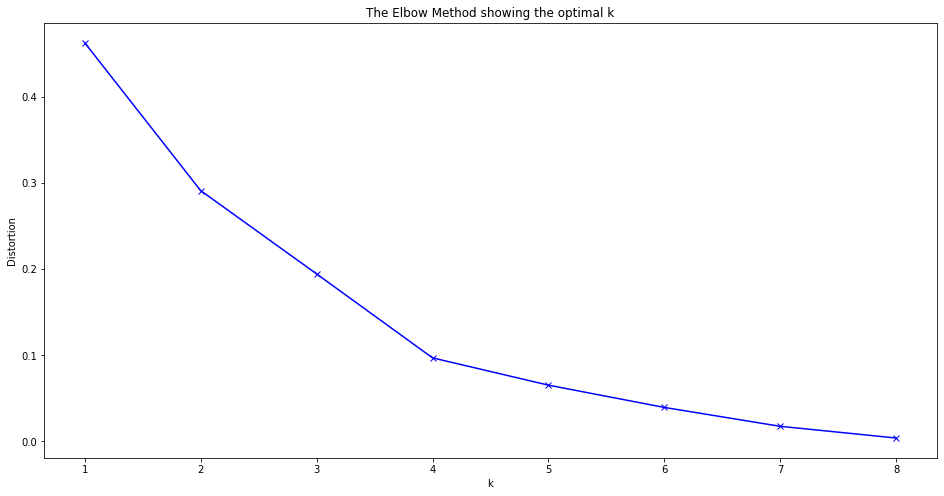

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

as shown by the elbow method, the best K seems to be 4!

In [ ]:
model = MiniBatchKMeans(n_clusters=4)
model.fit(divar1_normalized)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
labels=model.labels_

divar1['cluster'] = labels

divar1

,city,brand_Acer::ایسر,brand_Alienware::ایلین‌ویر,brand_Amazon::آمازون,brand_Apple::اپل,brand_Asus::ایسوس,brand_BlackBerry::بلک‌بری,brand_Compaq::کامپک,brand_Dell::دل,brand_Farassoo::فراسو,brand_Fujitsu::فوجیتسو,brand_Gigabyte::گیگابایت,brand_HP::اچ‌پی,brand_HTC::اچ‌تی‌سی,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,...,cat3_historical-objects,cat3_industrial,cat3_instrument-cleaning-tailoring,cat3_jewelry,cat3_kitchen,cat3_laptops,cat3_light,cat3_lighting,cat3_microwave-stove,cat3_mobile-phones,cat3_mobile-tablet-accessories,cat3_modem-and-network-equipment,cat3_mp3-player,cat3_offices,cat3_parts-and-accessories,cat3_personal-toys,cat3_piano-keyboard,cat3_printer-scaner-copier,cat3_repair-tool,cat3_rhinestones,cat3_rodents-rabbits,cat3_shoes-belt-bag,cat3_shop-and-cash,cat3_sofa-armchair,cat3_stereo-surround,cat3_storage,cat3_stove-and-heating,cat3_strollers-and-accessories,cat3_tables-and-chairs,cat3_tablet,cat3_textile-ornaments,cat3_traditional,cat3_training,cat3_tv-and-stereo-furniture,cat3_tv-projector,cat3_video-dvdplayer,cat3_washer-dryer,cat3_watches,cat3_winter-sports,cluster
0,Ahvaz,4.0,0.0,5.0,900.0,1.0,44.0,0.0,7.0,22.0,0.0,0.0,0.0,183.0,524.0,224.0,74.0,0.0,4.0,206.0,1719.0,35.0,200.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,531.0,0.0,...,0.0,876.0,464.0,395.0,385.0,0.0,4879.0,0.0,359.0,4296.0,543.0,491.0,0.0,0.0,671.0,0.0,0.0,0.0,0.0,0.0,0.0,1345.0,978.0,2452.0,0.0,1383.0,1454.0,0.0,2032.0,0.0,554.0,0.0,435.0,1254.0,1100.0,0.0,339.0,0.0,0.0,0
1,Isfahan,6.0,0.0,7.0,1220.0,54.0,92.0,0.0,13.0,30.0,0.0,0.0,0.0,251.0,612.0,263.0,162.0,0.0,7.0,372.0,1747.0,83.0,268.0,0.0,0.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0,813.0,80.0,...,0.0,1825.0,482.0,0.0,0.0,0.0,8773.0,461.0,426.0,5021.0,872.0,376.0,0.0,325.0,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0,1434.0,3305.0,389.0,1424.0,892.0,0.0,1825.0,387.0,0.0,0.0,532.0,683.0,1114.0,0.0,395.0,411.0,0.0,1
2,Karaj,39.0,0.0,10.0,1258.0,127.0,115.0,3.0,84.0,22.0,5.0,1.0,56.0,309.0,718.0,219.0,258.0,12.0,11.0,340.0,1862.0,97.0,508.0,0.0,11.0,2.0,120.0,366.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,718.0,919.0,82.0,...,0.0,1685.0,744.0,0.0,509.0,405.0,11057.0,797.0,750.0,5443.0,658.0,428.0,0.0,547.0,846.0,529.0,0.0,375.0,0.0,0.0,0.0,2839.0,2048.0,5259.0,745.0,2936.0,952.0,408.0,3130.0,421.0,841.0,0.0,680.0,1366.0,1610.0,0.0,524.0,693.0,0.0,0
3,Kermanshah,5.0,0.0,2.0,254.0,0.0,23.0,0.0,6.0,11.0,0.0,0.0,0.0,85.0,348.0,107.0,71.0,0.0,9.0,281.0,1039.0,47.0,223.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362.0,0.0,...,0.0,572.0,0.0,0.0,0.0,0.0,2277.0,0.0,0.0,2582.0,374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1474.0,643.0,1342.0,0.0,564.0,0.0,0.0,837.0,0.0,0.0,0.0,0.0,483.0,496.0,0.0,0.0,0.0,0.0,3
4,Mashhad,88.0,0.0,76.0,1646.0,146.0,133.0,4.0,143.0,52.0,9.0,2.0,122.0,440.0,1456.0,532.0,479.0,17.0,37.0,553.0,3402.0,168.0,816.0,0.0,15.0,2.0,357.0,729.0,0.0,0.0,373.0,0.0,478.0,0.0,0.0,0.0,0.0,1198.0,1165.0,167.0,...,398.0,2169.0,1259.0,582.0,588.0,681.0,15088.0,852.0,872.0,9560.0,1505.0,563.0,0.0,639.0,1564.0,930.0,0.0,414.0,0.0,0.0,0.0,5072.0,2876.0,5786.0,816.0,4126.0,2061.0,578.0,3936.0,621.0,1261.0,0.0,871.0,2196.0,2356.0,0.0,844.0,741.0,0.0,0
5,Qom,6.0,0.0,4.0,437.0,1.0,19.0,0.0,2.0,16.0,0.0,0.0,0.0,131.0,470.0,94.0,71.0,0.0,2.0,215.0,1120.0,52.0,198.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,695.0,359.0,0.0,0.0,0.0,1683.0,0.0,0.0,2925.0,541.0,0.0,0.0,0.0,455.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,719.0,1232.0,0.0,1255.0,524.0,0.0

# **PART 2 -- clustering cities based on the items sold (DIGIKALA)**

In [15]:
digikala_orders['city_name_fa'].value_counts()

تهران        108306
مشهد           6024
اصفهان         5992
کرج            5934
اهواز          4313
              ...  
رضی               1
میلاجرد           1
قوشچی             1
هندودر            1
آبی بیگلو         1
Name: city_name_fa, Length: 906, dtype: int64

In [16]:
dfl = digikala_orders.filter(['city_name_fa','ID_Item'])

dfl.head()

,city_name_fa,ID_Item
0,محمود آباد,21386
1,خرمدره,248497
2,قرچک,50144
3,قم,70208
4,تهران,67627


In [18]:
digikala_filtered = dfl.loc[(dfl['city_name_fa'] == 'تهران') | (dfl['city_name_fa'] == 'مشهد') | (dfl['city_name_fa'] == 'اهواز') | (dfl['city_name_fa'] == 'اصفهان') | (dfl['city_name_fa'] == 'کرج') | (dfl['city_name_fa'] == 'کرمانشاه') | (dfl['city_name_fa'] == 'قم') | (dfl['city_name_fa'] == 'شیراز') | (dfl['city_name_fa'] == 'تبریز')]

In [19]:
digikala_filtered = digikala_filtered.sample(frac=0.8, replace=True, random_state=1) # we'll be finding clusters on 0.8 of the data, since the entire data is way too big -- random sample half data

In [ ]:
dummy = pd.get_dummies(digikala_filtered['ID_Item'],  sparse=True)
dummy.head()

,82,86,91,93,113,136,147,152,216,281,312,1391,1393,1397,1398,1403,1413,1419,1420,1422,1424,1428,1434,1495,1498,1514,1529,1536,1544,1554,1557,1575,1584,1588,1595,1596,1597,1612,1620,1621,...,2006381,2007294,2009891,2009907,2009998,2010529,2011320,2015174,2015271,2016236,2016618,2017059,2020431,2021180,2022669,2023163,2027492,2029464,2030049,2030845,2035938,2036513,2036517,2037182,2037185,2038333,2039395,2041577,2042468,2042547,2049676,2050131,2050957,2056354,2059919,2063420,2067149,2082626,2082782,2084160
180487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
digikala_ct = pd.concat([digikala_filtered, dummy], axis=1, join='inner')

del digikala_ct['ID_Item']
# del digikala_filtered 
# del dummy

In [ ]:
digikala_ct

,city_name_fa,82,86,91,93,113,136,147,152,216,281,312,1391,1393,1397,1398,1403,1413,1419,1420,1422,1424,1428,1434,1495,1498,1514,1529,1536,1544,1554,1557,1575,1584,1588,1595,1596,1597,1612,1620,...,2006381,2007294,2009891,2009907,2009998,2010529,2011320,2015174,2015271,2016236,2016618,2017059,2020431,2021180,2022669,2023163,2027492,2029464,2030049,2030845,2035938,2036513,2036517,2037182,2037185,2038333,2039395,2041577,2042468,2042547,2049676,2050131,2050957,2056354,2059919,2063420,2067149,2082626,2082782,2084160
180487,کرج,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7233,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70321,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
153884,اهواز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103136,کرج,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134669,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80823,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36141,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15714,تهران,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
digikala = digikala_ct.groupby(by=['city_name_fa'], as_index=False).sum()

In [ ]:
digikala

,city_name_fa,82,86,91,93,113,136,147,152,216,281,312,1391,1393,1397,1398,1403,1413,1419,1420,1422,1424,1428,1434,1495,1498,1514,1529,1536,1544,1554,1557,1575,1584,1588,1595,1596,1597,1612,1620,...,2006381,2007294,2009891,2009907,2009998,2010529,2011320,2015174,2015271,2016236,2016618,2017059,2020431,2021180,2022669,2023163,2027492,2029464,2030049,2030845,2035938,2036513,2036517,2037182,2037185,2038333,2039395,2041577,2042468,2042547,2049676,2050131,2050957,2056354,2059919,2063420,2067149,2082626,2082782,2084160
0,اصفهان,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,اهواز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,تبریز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,تهران,1,0,2,0,0,1,0,1,2,1,1,1,5,4,4,3,1,1,0,1,2,1,0,0,1,1,2,12,6,3,5,1,4,3,5,6,2,6,1,...,2,0,1,0,5,1,0,0,0,2,1,1,3,2,1,2,1,3,2,2,1,2,0,2,1,1,1,1,1,1,1,1,1,1,0,1,4,1,2,1
4,شیراز,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,قم,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,مشهد,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,2,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,کرج,0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,کرمانشاه,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# digikala = digikala_filtered.groupby(by=['city_name_fa', 'ID_Item']).size()
# digikala

In [ ]:
#digikala_filtered.reset_index().groupby( ['city_name_fa', 'ID_Item'],as_index=False ).count()

#digikala.shape

In [ ]:
# ds = digikala[['ID_Item','تهران', 'شیراز', 'یزد', 'مشهد', 'کرمان']] #testing in order to make sure the summed values are correct
# ds

In [ ]:
digi_normalized = normalize(digikala.iloc[:, 1:]) #starting from the second column, not getting city

In [ ]:
digi_normalized

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05107095, 0.01021419, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Using Elbow method to find best number of cluster for kmeans**

In [ ]:
distortions = []
K = range(1,9) # checking between 1 and 9 clusters 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(digi_normalized)
    distortions.append(kmeanModel.inertia_)

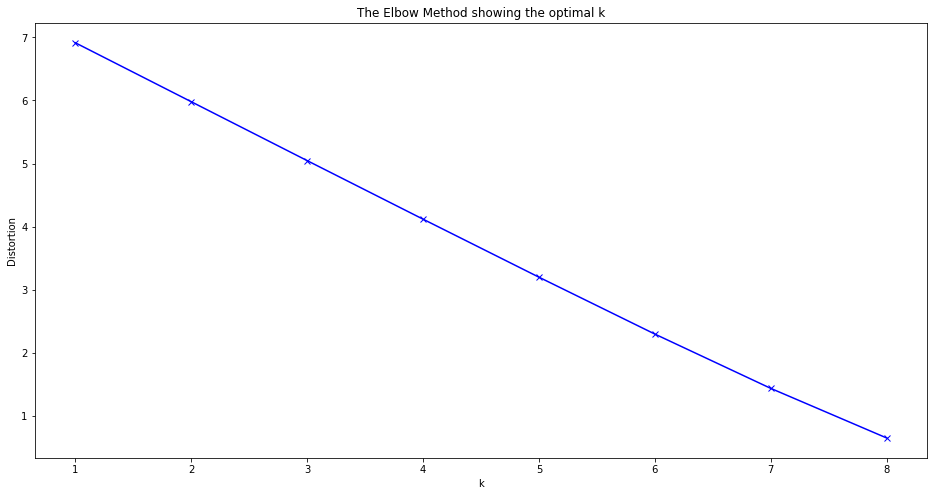

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Training on model**

In [ ]:
model = MiniBatchKMeans(n_clusters=8)
model.fit(digi_normalized)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
labels=model.labels_

digikala['cluster'] = labels
digikala[1:50] 

,city_name_fa,82,86,91,93,113,136,147,152,216,281,312,1391,1393,1397,1398,1403,1413,1419,1420,1422,1424,1428,1434,1495,1498,1514,1529,1536,1544,1554,1557,1575,1584,1588,1595,1596,1597,1612,1620,...,2007294,2009891,2009907,2009998,2010529,2011320,2015174,2015271,2016236,2016618,2017059,2020431,2021180,2022669,2023163,2027492,2029464,2030049,2030845,2035938,2036513,2036517,2037182,2037185,2038333,2039395,2041577,2042468,2042547,2049676,2050131,2050957,2056354,2059919,2063420,2067149,2082626,2082782,2084160,cluster
1,اهواز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
2,تبریز,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,تهران,1,0,2,0,0,1,0,1,2,1,1,1,5,4,4,3,1,1,0,1,2,1,0,0,1,1,2,12,6,3,5,1,4,3,5,6,2,6,1,...,0,1,0,5,1,0,0,0,2,1,1,3,2,1,2,1,3,2,2,1,2,0,2,1,1,1,1,1,1,1,1,1,1,0,1,4,1,2,1,1
4,شیراز,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5,قم,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
6,مشهد,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,2,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,کرج,0,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
8,کرمانشاه,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


by the results obtained here we can see that "Mashhad" and "Tehran" fit into the same cluster. this is due to them both being the most populated cities, where in turn have the most similar transactions

# **PART 3 -- Comparing the above resuts**

For both of the previous sections we considered using K-Means clustering, and using the elbow method to find a near estimate to the best number of clusters. 

--------

In the first part, we had a pretty low number for our item ID's (around 160), note that we didn't directly have these item IDs and found them by considering the possible combinations for the "cat1","cat2","cat3", and "brand" columns. The number of cities in our dataset were 8. So in total we had 8 datapoints(cities) to consider, and 161 features(item_id's) to cluster them on. 
For this section, the result of using the elbow method showed a pretty clear dent on k=4, so we used this number for the number of our clusters. 

--------

In the second part, even Though we considered a smaller subset of the entire Digikala dataset (by using only the 8 main cities in which we had in the previous section), the number of unique item id's is drastically higher than the previous section (around 50000!) and since we perform clustering on 8 datapoints(the cities) over 50000 features(item_id's) it seems plausible that since the feature space is very large, no two cities will be similar. Hence, by using the elbow method we see that the result is almost one straight line where the higher the number of clusters, the less the distortions. So the option we are left is to just use 8 clusters (one for each city). Interestingly, we see that the cities "Mashhad" and "Tehran" are put into the same cluster, even with the results we saw in the elbow method. This is due to both of them being very large cities and having similar number of transactions on the various items.  


# **PART 4 -- clustering items based on the prices of placed ads (DIVAR)**

In [22]:
divar2 = divar_posts.filter(['item_id', 'price'])
divar2[500:520]

,item_id,price
500,8,3000
501,33,70000
502,8,40000
503,55,100000
504,71,-1
505,42,-1
506,5,-1
507,10,10000
508,38,6500000
509,1,150000


**define a rounding function for the prices**

In [23]:
def myround(x, base):
    return base * round(x/base)

----

**replacing "-1" prices with the most common in the group**

In [24]:
print(divar2['price'].value_counts())

-1           161432
 100000       31562
 50000        28922
 150000       28389
 200000       27597
              ...  
 3480000          1
 153              1
 82300000         1
 9000008          1
 2049             1
Name: price, Length: 3273, dtype: int64


In [25]:
'''Trying to replace the -1 prices(not available) with the most frequent prices of each group'''


groups = divar2.groupby(by=['item_id'])
print((divar2['price'] == -1).sum()) #the number of rows which have -1 for price

for group_name, df_group in groups:
    #print(f"{df_group}  \n\n-----\n\n")
    List = divar2.loc[(divar2['item_id'] == group_name) & (divar2['price'] != -1)]['price'].tolist()
    if List:
        most_frequent = max(set(List), key = List.count)
        divar2.loc[(divar2['item_id'] == group_name) & (divar2['price'] == -1), ['price']] = most_frequent

161432


In [26]:
print((divar2['price'] == -1).sum())
print(divar2['price'].value_counts())

0
100000      71964
50000       55319
150000      44739
200000      41727
500000      30401
            ...  
135500          1
2520000         1
52950000        1
14600           1
2049            1
Name: price, Length: 3272, dtype: int64


**Round the prices, to have a less posibility space for the prices in which we'll be using**

In [27]:
divar2.loc[(divar2['price']<999)]

,item_id,price
61,35,500
98,50,320
141,1,400
455,6,60
1060,12,40
...,...,...
946430,35,400
946432,8,150
946468,5,70
946967,31,70


In [28]:
#myround(divar2['price'],5000)

for i in range(1,8): #1 to 4 
  bs = (10 ** i) #if /2 we get base 5x's, but not enough ram to group by
  prc1 = 10 **(i+1)-1
  prc2 = 10 **(i+2)-1
  if (i==1):
    divar2.loc[(divar2['price']<=prc2), 'price'] = myround(divar2.loc[(divar2['price']<=prc2)]['price'], base=bs)
  else:
    divar2.loc[(divar2['price']>prc1) & (divar2['price']<=prc2), 'price'] = myround(divar2.loc[(divar2['price']>prc1) & (divar2['price']<=prc2)]['price'], base=bs)

# divar2.loc[(divar2['price']<=999), 'price'] = myround(divar2.loc[(divar2['price']<=999)]['price'], base=10)
# divar2.loc[(divar2['price']>999) & (divar2['price']<=9999), 'price'] = myround(divar2.loc[(divar2['price']>999) & (divar2['price']<=9999)]['price'], base=100)
# divar2.loc[(divar2['price']>=9999) & (divar2['price']<99999), 'price'] = myround(divar2.loc[(divar2['price']>=9999) & (divar2['price']<99999)]['price'], base=1000)

In [29]:
divar2['price'] = divar2['price'].astype(int)

In [30]:
divar2.loc[(divar2['price']<999)]['price']

61        500
98        320
141       400
455        60
1060       40
         ... 
946430    400
946432    150
946468     70
946967     70
946971    150
Name: price, Length: 3030, dtype: int64

In [31]:
divar2_dm = pd.get_dummies(divar2, columns=["price"])

In [32]:
divar2_dm

,item_id,price_0,price_10,price_20,price_30,price_40,price_50,price_60,price_70,price_80,price_90,price_100,price_110,price_120,price_130,price_140,price_150,price_160,price_170,price_180,price_190,price_200,price_210,price_220,price_230,price_240,price_250,price_260,price_270,price_280,price_290,price_300,price_310,price_320,price_330,price_340,price_350,price_360,price_370,price_380,...,price_90000000,price_91000000,price_92000000,price_93000000,price_94000000,price_95000000,price_96000000,price_97000000,price_98000000,price_99000000,price_100000000,price_110000000,price_120000000,price_130000000,price_140000000,price_150000000,price_160000000,price_170000000,price_180000000,price_190000000,price_200000000,price_210000000,price_220000000,price_230000000,price_240000000,price_250000000,price_260000000,price_270000000,price_280000000,price_290000000,price_300000000,price_310000000,price_320000000,price_330000000,price_340000000,price_350000000,price_360000000,price_380000000,price_390000000,price_400000000
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947630,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
947631,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
947632,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
947633,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
divar2 = divar2_dm.groupby(by=['item_id'], as_index=False).sum() 

In [34]:
divar2

,item_id,price_0,price_10,price_20,price_30,price_40,price_50,price_60,price_70,price_80,price_90,price_100,price_110,price_120,price_130,price_140,price_150,price_160,price_170,price_180,price_190,price_200,price_210,price_220,price_230,price_240,price_250,price_260,price_270,price_280,price_290,price_300,price_310,price_320,price_330,price_340,price_350,price_360,price_370,price_380,...,price_90000000,price_91000000,price_92000000,price_93000000,price_94000000,price_95000000,price_96000000,price_97000000,price_98000000,price_99000000,price_100000000,price_110000000,price_120000000,price_130000000,price_140000000,price_150000000,price_160000000,price_170000000,price_180000000,price_190000000,price_200000000,price_210000000,price_220000000,price_230000000,price_240000000,price_250000000,price_260000000,price_270000000,price_280000000,price_290000000,price_300000000,price_310000000,price_320000000,price_330000000,price_340000000,price_350000000,price_360000000,price_380000000,price_390000000,price_400000000
0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.0,5.0,10.0,9.0,10.0,15.0,4.0,7.0,6.0,4.0,10.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,8.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,8.0,13.0,7.0,1.0,105.0,4.0,14.0,24.0,8.0,186.0,165.0,241.0,106.0,164.0,63.0,140.0,54.0,112.0,44.0,92.0,35.0,87.0,46.0,83.0,31.0,47.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,7.0,1.0,6.0,3.0,2.0,3.0,5.0,3.0,4.0,1.0,8.0,1.0,3.0,2.0,0.0,3.0,1.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,160,0.

price zero doesn't make sense. lets add it to price_10

In [38]:
divar2['price_10'] = divar2['price_10'] +  divar2['price_0']
del (divar2['price_0'])

In [39]:
divar2

,item_id,price_10,price_20,price_30,price_40,price_50,price_60,price_70,price_80,price_90,price_100,price_110,price_120,price_130,price_140,price_150,price_160,price_170,price_180,price_190,price_200,price_210,price_220,price_230,price_240,price_250,price_260,price_270,price_280,price_290,price_300,price_310,price_320,price_330,price_340,price_350,price_360,price_370,price_380,price_390,...,price_90000000,price_91000000,price_92000000,price_93000000,price_94000000,price_95000000,price_96000000,price_97000000,price_98000000,price_99000000,price_100000000,price_110000000,price_120000000,price_130000000,price_140000000,price_150000000,price_160000000,price_170000000,price_180000000,price_190000000,price_200000000,price_210000000,price_220000000,price_230000000,price_240000000,price_250000000,price_260000000,price_270000000,price_280000000,price_290000000,price_300000000,price_310000000,price_320000000,price_330000000,price_340000000,price_350000000,price_360000000,price_380000000,price_390000000,price_400000000
0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.0,10.0,9.0,10.0,15.0,4.0,7.0,6.0,4.0,10.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,8.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,8.0,13.0,7.0,1.0,105.0,4.0,14.0,24.0,8.0,186.0,165.0,241.0,106.0,164.0,63.0,140.0,54.0,112.0,44.0,92.0,35.0,87.0,46.0,83.0,31.0,47.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,8.0,6.0,3.0,2.0,3.0,5.0,3.0,4.0,1.0,8.0,1.0,3.0,2.0,0.0,3.0,1.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,160,

In [40]:
divar2_normalized = normalize(divar2.iloc[:, 1:])

In [41]:
divar2_normalized

array([[0.00016758, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00100214, 0.00143163, 0.00128846, ..., 0.        , 0.        ,
        0.        ],
       [0.00025224, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**Using Elbow method to find best number of cluster for kmeans**

In [42]:
distortions = []
K = range(1,161) # checking between 1 and 160 clusters 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(divar2_normalized)
    distortions.append(kmeanModel.inertia_)

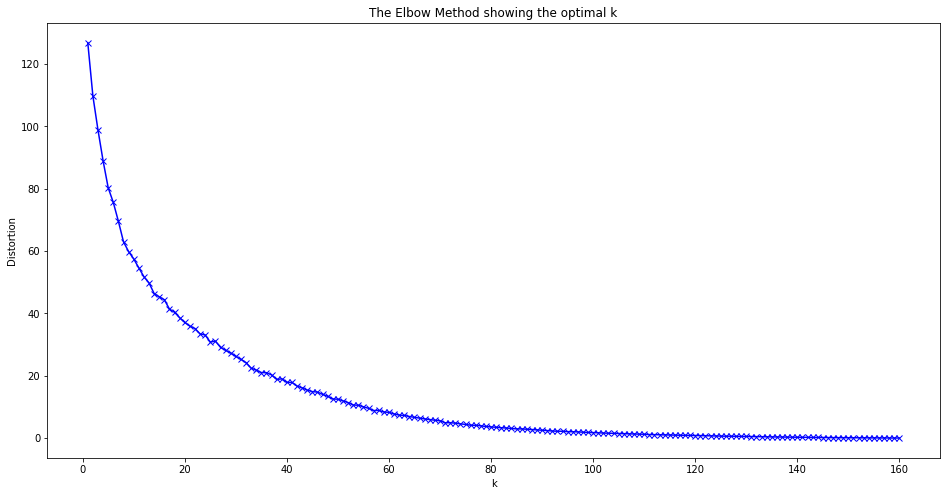

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

as it can be seen, around 50 or 60 clusters seems to work the best 

**doing the training on model**

In [44]:
model = MiniBatchKMeans(n_clusters=60)
model.fit(divar2_normalized)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=60, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [45]:
labels=model.labels_

divar2['cluster'] = labels
divar2[1:50] 

,item_id,price_10,price_20,price_30,price_40,price_50,price_60,price_70,price_80,price_90,price_100,price_110,price_120,price_130,price_140,price_150,price_160,price_170,price_180,price_190,price_200,price_210,price_220,price_230,price_240,price_250,price_260,price_270,price_280,price_290,price_300,price_310,price_320,price_330,price_340,price_350,price_360,price_370,price_380,price_390,...,price_91000000,price_92000000,price_93000000,price_94000000,price_95000000,price_96000000,price_97000000,price_98000000,price_99000000,price_100000000,price_110000000,price_120000000,price_130000000,price_140000000,price_150000000,price_160000000,price_170000000,price_180000000,price_190000000,price_200000000,price_210000000,price_220000000,price_230000000,price_240000000,price_250000000,price_260000000,price_270000000,price_280000000,price_290000000,price_300000000,price_310000000,price_320000000,price_330000000,price_340000000,price_350000000,price_360000000,price_380000000,price_390000000,price_400000000,cluster
1,2,7.0,10.0,9.0,10.0,15.0,4.0,7.0,6.0,4.0,10.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,8.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
2,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,13.0,7.0,1.0,105.0,4.0,14.0,24.0,8.0,186.0,165.0,241.0,106.0,164.0,63.0,140.0,54.0,112.0,44.0,92.0,35.0,87.0,46.0,83.0,31.0,47.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31
3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
4,5,8.0,6.0,3.0,2.0,3.0,5.0,3.0,4.0,1.0,8.0,1.0,3.0,2.0,0.0,3.0,1.0,0.0,1.0,4.0,5.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
5,6,3.0,4.0,1.0,5.0,14.0,12.0,4.0,9.0,2.0,9.0,0.0,6.0,2.0,1.0,7.0,2.0,1.0,2.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
6,7,1.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,16.0,18.0,28.0,53.0,58.0,30.0,26.0,3.0,41.0,52.0,56.0,13.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
7,8,6.0,20.0,19.0,40.0,20.0,20.0,12.0,16.0,5.0,20.0,7.0,9.0,5.0,5.0,14.0,2.0,1.0,2.0,0.0,8.0,0.0,1.0,1.0,0.0,10.0,1.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,10,0.0,10.0,4.0,5.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
10,11,6.0,2.0,1.0,